In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import pandas_profiling as pp

Adapted from: https://medium.com/@williamkoehrsen/data-analysis-with-python-19434f5d6324

In [2]:
# load csv files
batting = pd.read_csv('./core/Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [3]:
# extract specific data from loaded csv's
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
batting_by_years = batting[batting['yearID'].isin(years)]

In [4]:
batting_by_years = batting_by_years.groupby(['playerID', 'yearID', 'teamID'], as_index=False).sum()
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2007,CHA,1,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2008,BOS,1,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,aardsda01,2009,SEA,1,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2010,SEA,1,53,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2012,NYA,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,aardsda01,2013,NYN,1,43,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,aardsda01,2015,ATL,1,33,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
7,abadfe01,2010,HOU,1,22,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
8,abadfe01,2011,HOU,1,29,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,abadfe01,2012,HOU,1,37,7,0,1,0,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,1.0


In [5]:
batting_by_years.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000
mean,2012.090129,1.085901,49.098392,116.901864,15.146243,30.084043,5.979502,0.620844,3.487733,14.427071,1.997310,0.751842,10.773877,25.274934,0.779579,1.141375,0.977964,0.901928,2.634104
std,3.176328,0.298813,45.239775,178.353290,25.608784,49.132340,10.176789,1.524533,7.187889,25.207698,5.692988,1.839293,19.093810,37.822372,2.277744,2.503591,2.115748,1.789872,4.695903
min,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,1.000000,32.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,1.000000,72.000000,170.000000,19.000000,41.000000,8.000000,0.000000,3.000000,18.000000,1.000000,1.000000,14.000000,36.500000,0.000000,1.000000,1.000000,1.000000,3.000000
max,2017.000000,6.000000,163.000000,716.000000,143.000000,238.000000,56.000000,23.000000,59.000000,156.000000,78.000000,23.000000,143.000000,223.000000,44.000000,30.000000,20.000000,15.000000,32.000000


In [6]:
batting_by_years.shape

(15611, 21)

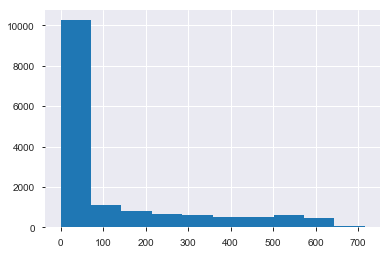

In [7]:
batting_by_years['AB'].hist()

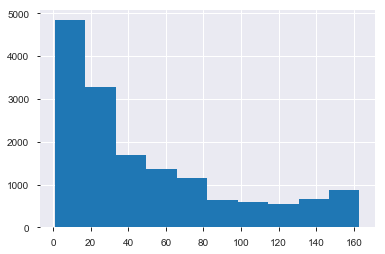

In [8]:
batting_by_years['G'].hist()

In [9]:
# filter to include only players with more than 20 games played and 20 at-bats
batting_by_years = batting_by_years[(batting_by_years['G'] >= 20) & 
                                    (batting_by_years['AB'] >= 20)]
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0


In [10]:
# # define a function that makes sure that only players that are in all five years are included
# def find_players_in_all_years(records):
#     # create list with all playerID's
#     list_of_IDs = list(records['playerID'])
#     all_years = set()
    
#     # iterate through list of ID's and count how many times it occurs in the list
#     for player in list_of_IDs:
#         if (list_of_IDs.count(player)) == len(years):
#             all_years.add(player)
            
#     # return dataframe with players in all desired years
#     return records[records['playerID'].isin(all_years)]


In [11]:
# create new dataframe using above function
# batting_by_years_agg = find_players_in_all_years(batting_by_years)
# batting_by_years_agg.head(20)

In [12]:
batting_by_years.shape

(6766, 21)

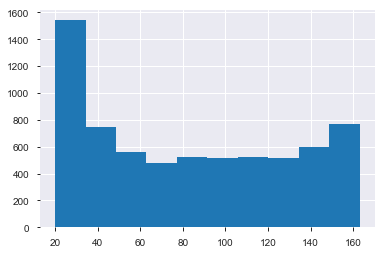

In [13]:
batting_by_years['G'].hist()

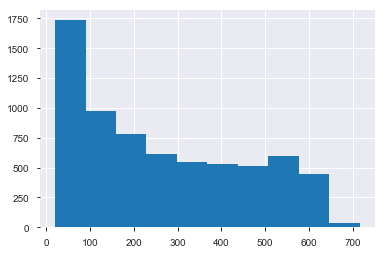

In [14]:
batting_by_years['AB'].hist()

In [15]:
# sns.pairplot(batting_by_years_agg)

In [16]:
# import people csv
people = pd.read_csv('../baseballdatabank/core/People.csv',
                    usecols=['playerID','nameFirst','nameLast',
                            'bats','throws','debut'])

In [17]:
# set index so that we can join with batting data
people.set_index('playerID', inplace=True)

In [18]:
# join batting dataframe with other relavent info from people
batting_by_years = batting_by_years.join(people, on='playerID', how='inner')

In [19]:
batting_by_years.isnull().sum()

playerID     0
yearID       0
teamID       0
stint        0
G            0
AB           0
R            0
H            0
2B           0
3B           0
HR           0
RBI          0
SB           0
CS           0
BB           0
SO           0
IBB          0
HBP          0
SH           0
SF           0
GIDP         0
nameFirst    0
nameLast     0
bats         0
throws       0
debut        0
dtype: int64

In [20]:
# create function that converts the bats and throws columns to numeric
def bats_throws(col):
    if col =='R':
        return 1
    else:
        return 0

In [21]:
# convert bats and throws columns
batting_by_years['throws_R'] = batting_by_years['throws'].apply(bats_throws)
batting_by_years['bats_R'] = batting_by_years['bats'].apply(bats_throws)
batting_by_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0


In [22]:
# create column for batting average
batting_by_years['AVE'] = batting_by_years['H'] / batting_by_years['AB']

In [23]:
# compute plate appearances and on base percentage 
plate_appearances = batting_by_years['AB'] + batting_by_years['BB'] + batting_by_years['SF'] + batting_by_years['HBP']
batting_by_years['OBP'] = (batting_by_years['H'] + batting_by_years['BB'] + batting_by_years['HBP']) / plate_appearances

In [24]:
# create slugging percent column
single = ((batting_by_years['H'] - batting_by_years['2B']) - batting_by_years['3B']) - batting_by_years['HR']
batting_by_years['Slug_Percent'] = ((batting_by_years['HR'] * 4) +
                                        (batting_by_years['3B'] * 3) +
                                        (batting_by_years['2B'] * 2) +
                                        single) / batting_by_years['AB']

In [25]:
# create on base plus slugging percent column
hr = batting_by_years['HR'] * 4
triple = batting_by_years['3B'] * 3
double = batting_by_years['2B'] * 2
batting_by_years['OPS'] = batting_by_years['OBP'] + batting_by_years['Slug_Percent']

In [26]:
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572


In [27]:
batting_by_years.isnull().sum()

playerID        0
yearID          0
teamID          0
stint           0
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI             0
SB              0
CS              0
BB              0
SO              0
IBB             0
HBP             0
SH              0
SF              0
GIDP            0
nameFirst       0
nameLast        0
bats            0
throws          0
debut           0
throws_R        0
bats_R          0
AVE             0
OBP             0
Slug_Percent    0
OPS             0
dtype: int64

In [28]:
from datetime import datetime

In [29]:
# convert debut to datetime
batting_by_years['debut'] = pd.to_datetime(batting_by_years['debut'])

In [30]:
# create new columns for debutYear and finalYear 
batting_by_years['debutYear'] = pd.to_numeric(batting_by_years['debut'].dt.strftime('%Y'), errors='coerce')
batting_by_years['currentYear'] = batting_by_years['yearID'] 
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014


In [31]:
# create a years in the league up to that point column
batting_by_years['YRSPRO'] = batting_by_years['currentYear'] - batting_by_years['debutYear']

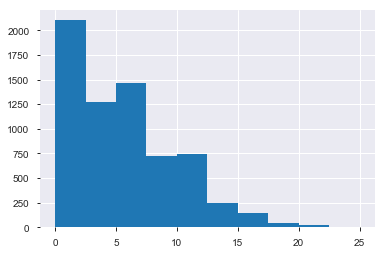

In [32]:
batting_by_years['YRSPRO'].hist()

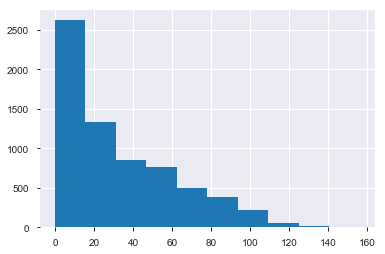

In [33]:
batting_by_years['RBI'].hist()

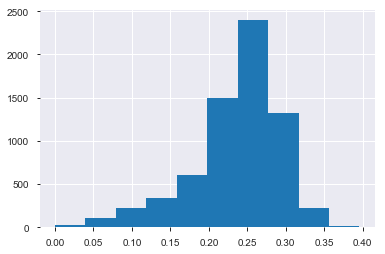

In [34]:
batting_by_years['AVE'].hist()

In [35]:
batting_by_years._get_numeric_data().columns

Index(['yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'throws_R',
       'bats_R', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'debutYear',
       'currentYear', 'YRSPRO'],
      dtype='object')

In [36]:
change_cols = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
               'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
               'AVE', 'OBP', 'Slug_Percent', 'OPS']

# percent_change = batting_by_years[change_cols].pct_change().replace(np.inf, np.nan)

In [37]:
percent_change = batting_by_years.groupby('playerID')[change_cols].pct_change().replace(np.inf, np.nan)

In [38]:
percent_change.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVE,OBP,Slug_Percent,OPS
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,-0.028571,-0.276316,-0.375000,0.133333,0.666667,NaN,0.00,0.000000,-0.285714,1.000000,-0.500000,0.045455,NaN,0.000000,NaN,NaN,-1.000000,0.566061,0.427297,0.612121,0.532785
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.20,0.25,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,NaN,-0.666667,NaN,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.25,-0.25,0.030000,0.363636,-0.272727,0.287671,0.036697,2.5,0.000000,NaN,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930


In [39]:
# combine batting_by_years_agg and percent_change into a single dataframe
batter_and_change = pd.concat([batting_by_years, percent_change.rename(columns={
    'G': 'G_chg', 
    'AB': 'AB_chg', 
    'R': 'R_chg', 
    'H': 'H_chg', 
    '2B': '2B_chg', 
    '3B': '3B_chg', 
    'HR': 'HR_chg', 
    'RBI': 'RBI_chg', 
    'SB': 'SB_chg',
    'CS': 'CS_chg', 
    'BB': 'BB_chg', 
    'SO': 'SO_chg', 
    'IBB': 'IBB_chg', 
    'HBP': 'HBP_chg', 
    'SH': 'SH_chg', 
    'SF': 'SF_chg', 
    'GIDP': 'GIDP_chg',
    'AVE': 'AVE_chg', 
    'OBP': 'OBP_chg', 
    'Slug_Percent': 'Slug_chg', 
    'OPS': 'OPS_chg'
})], axis=1)

In [40]:
# fill nan values with 0
batter_and_change.fillna(0, inplace=True)

In [41]:
batter_and_change.shape

(6766, 56)

In [42]:
# batter_and_change.to_csv('batter_and_change.csv')

In [43]:
batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
batter_and_change['bats_R'].value_counts(normalize=True)

1    0.553355
0    0.446645
Name: bats_R, dtype: float64

In [46]:
batter_and_change._get_numeric_data().columns

Index(['yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'throws_R',
       'bats_R', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'debutYear',
       'currentYear', 'YRSPRO', 'G_chg', 'AB_chg', 'R_chg', 'H_chg', '2B_chg',
       '3B_chg', 'HR_chg', 'RBI_chg', 'SB_chg', 'CS_chg', 'BB_chg', 'SO_chg',
       'IBB_chg', 'HBP_chg', 'SH_chg', 'SF_chg', 'GIDP_chg', 'AVE_chg',
       'OBP_chg', 'Slug_chg', 'OPS_chg'],
      dtype='object')

In [47]:
# HR's is the target
attributes = ['stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'throws_R', 'bats_R', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'YRSPRO', 
       'G_chg', 'AB_chg', 'R_chg', 'H_chg', '2B_chg',
       '3B_chg', 'RBI_chg', 'SB_chg', 'CS_chg', 'BB_chg', 'SO_chg',
       'IBB_chg', 'HBP_chg', 'SH_chg', 'SF_chg', 'GIDP_chg', 'AVE_chg',
       'OBP_chg', 'Slug_chg', 'OPS_chg']

In [48]:
# create dataframe without target
data_attributes = batter_and_change[attributes]
data_attributes.head(20)

,stint,G,AB,R,H,2B,3B,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
16,1,35,76,16,15,3,0,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,1,1,0.197368,0.237500,0.315789,0.553289,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,1,34,55,10,17,5,0,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,1,1,0.309091,0.338983,0.509091,0.848074,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785
18,1,158,605,123,171,40,5,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,1,0,0.282645,0.369099,0.444628,0.813727,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19,1,156,609,100,180,39,4,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,1,0,0.295567,0.371345,0.471264,0.842609,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,1,152,563,96,165,29,3,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,1,0,0.293073,0.389805,0.435169,0.824974,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930
21,1,154,573,88,146,41,1,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,1,0,0.254799,0.352324,0.434555,0.786879,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177
22,1,142,502,54,127,30,1,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,1,0,0.252988,0.352740,0.364542,0.717282,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447
24,2,92,195,28,48,8,1,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,1,0,0.246154,0.360870,0.343590,0.704459,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876
25,1,78,133,12,33,9,0,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,1,0,0.248120,0.341935,0.338346,0.680281,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321
26,1,145,556,80,176,35,2,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,1,1,0.316547,0.382637,0.580935,0.963572,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss = StandardScaler()
X_sc = ss.fit_transform(data_attributes)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
# import kmeans
from sklearn.cluster import KMeans
from sklearn import metrics

In [52]:
# create silhouette score dict
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    l = km.fit_predict(X_sc)
    s_score = metrics.silhouette_score(X_sc, l)
    s_score_dict[i] = [s_score]
    
s_score_dict

{2: [0.2426473502263],
 3: [0.2396508483640617],
 4: [0.1373599386212133],
 5: [0.13865384965303953],
 6: [0.10711137019152289],
 7: [0.10708578544484944],
 8: [0.1091804129810615],
 9: [0.11310989088202449],
 10: [0.08235920533439166]}

In [53]:
kmeans_model = KMeans(n_clusters=5, random_state=42)
distances = kmeans_model.fit_transform(X_sc)
labels = kmeans_model.labels_

In [54]:
labels

array([4, 4, 3, ..., 4, 4, 3])

In [55]:
batter_and_change['KMeans_label'] = labels
attributes.append('KMeans_label')

batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785,4
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494,3
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930,3
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177,3
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447,3
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876,4
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321,4
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [56]:
batter_and_change['KMeans_label'].value_counts()

4    3010
3    2168
1    1139
0     303
2     146
Name: KMeans_label, dtype: int64

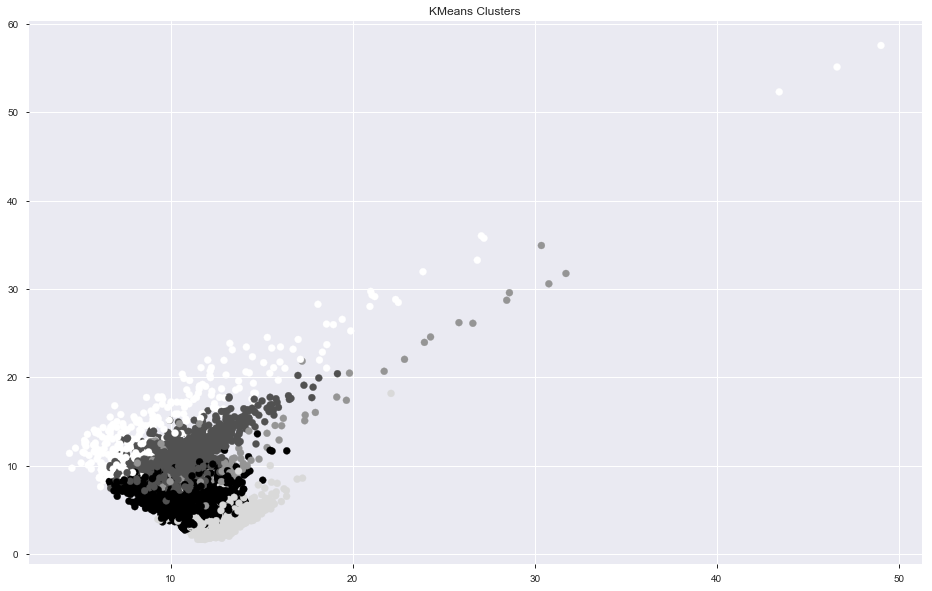

In [57]:
# create a scatter plot using labels from KMeans model as color
plt.figure(figsize=(16,10))
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('KMeans Clusters')

plt.show()

In [59]:
batter_and_change[batter_and_change['KMeans_label'] == 2]

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
217,alonsyo01,2011,CIN,1,47,88,9,29,4,0,5,15.0,0.0,0.0,10,21.0,0.0,0.0,0.0,0.0,2.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.329545,0.397959,0.545455,0.943414,2010,2011,1,1.136364,2.034483,3.500000,3.833333,1.000000,0.0,0.00,4.000000,0.000000,0.0,0.000000,1.100000,0.0,0.00,0.000000,0.000000,1.000000,0.592803,0.923469,0.977273,0.954214,2
310,anderch01,2015,ARI,1,28,48,0,5,0,0,0,3.0,0.0,0.0,1,23.0,0.0,0.0,8.0,0.0,2.0,Chase,Anderson,R,R,2014-05-11,1,1,0.104167,0.122449,0.104167,0.226616,2014,2015,1,0.272727,0.411765,0.000000,4.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.642857,0.0,-1.00,0.333333,0.000000,0.000000,2.541667,1.142857,2.541667,1.618181,2
328,anderma02,2007,NYN,2,43,69,14,22,7,0,3,25.0,3.0,1.0,5,12.0,1.0,0.0,1.0,2.0,2.0,Marlon,Anderson,L,R,1998-09-08,1,0,0.318841,0.355263,0.550725,0.905988,1998,2007,9,0.869565,1.653846,3.666667,2.666667,0.000000,0.0,0.00,11.500000,2.000000,0.0,0.666667,1.400000,0.0,0.00,0.000000,0.000000,0.000000,0.381643,0.144737,1.386473,0.674301,2
443,arrieja01,2016,CHN,1,31,65,7,17,2,1,2,7.0,0.0,0.0,4,28.0,0.0,0.0,1.0,0.0,1.0,Jake,Arrieta,R,R,2010-06-10,1,1,0.261538,0.304348,0.415385,0.719732,2010,2016,6,-0.060606,-0.177215,0.400000,0.416667,1.000000,0.0,0.00,2.500000,0.000000,0.0,3.000000,-0.377778,0.0,0.00,-0.666667,0.000000,0.000000,0.721795,0.872910,0.562637,0.680351,2
615,baileho02,2011,CIN,1,23,39,7,11,2,0,0,2.0,0.0,0.0,1,11.0,0.0,0.0,5.0,0.0,1.0,Homer,Bailey,R,R,2007-06-08,1,1,0.282051,0.300000,0.333333,0.633333,2007,2011,4,0.045455,0.026316,0.000000,2.666667,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,-0.352941,0.0,0.00,0.000000,0.000000,0.000000,2.572650,2.800000,3.222222,3.011111,2
617,baileho02,2013,CIN,1,32,58,3,9,1,0,0,1.0,0.0,0.0,3,18.0,0.0,1.0,11.0,0.0,2.0,Homer,Bailey,R,R,2007-06-08,1,1,0.155172,0.209677,0.172414,0.382091,2007,2013,6,-0.058824,-0.171429,2.000000,0.125000,0.000000,0.0,0.00,-0.800000,0.000000,0.0,2.000000,-0.379310,0.0,0.00,1.200000,0.000000,-0.333333,0.357759,0.654122,0.340996,0.496449,2
1182,billich01,2009,LAN,1,33,56,2,10,2,0,1,4.0,0.0,0.0,4,24.0,0.0,0.0,7.0,0.0,1.0,Chad,Billingsley,R,R,2006-06-15,1,1,0.178571,0.233333,0.267857,0.501190,2006,2009,3,-0.057143,-0.111111,1.000000,0.666667,0.000000,0.0,0.00,0.333333,0.000000,0.0,0.000000,-0.333333,0.0,0.00,0.400000,0.000000,0.000000,0.875000,0.563333,1.812500,1.049927,2
1244,blancgr01,2010,ATL,1,36,58,9,18,1,1,0,3.0,1.0,2.0,8,15.0,1.0,0.0,0.0,0.0,2.0,Gregor,Blanco,L,L,2008-03-30,0,0,0.310345,0.393939,0.362069,0.756008,2008,2010,2,0.500000,0.348837,0.800000,1.250000,0.000000,0.0,0.00,2.000000,-0.500000,0.0,1.000000,0.666667,0.0,0.00,-1.000000,0.000000,1.000000,0.668103,0.542929,0.556897,0.549587,2
1253,blanche01,2008,CHN,1,58,120,15,35,3,0,3,12.0,0.0,0.0,6,22.0,1.0,0.0,2.0,0.0,4.0,Henry,Blanco,R,R,1997-07-25,1,1,0.291667,0.325397,0.391667,0.717063,1997,2008,11,1.636364,1.222222,4.000000,2.888889,0.000000,0.0,0.00,2.000000,0.000000,0.0,2.000000,0.833333,0.0,0.00,1.000000,-1.000000,0.000000,0.750000,0.686147,0.762500,0.727012,2
1812,bumgama01,2014,SFN,1,34,66,10,17,2,0,4,15.0,0.0,0.0,2,29.0,0.0,1.0,8.0,1.0,0.0,Madison,Bumgarner,R,L,2009-09-08,0,1,0.257576,0.285714,0.469697,0.755411,2009,2014,5,0.096774,0.178571,2.333333,1.833333,0.000000,0.0,0.00,2.750000,0.000000,0.0,-0.600000,-0.033333,0.0,0.00,0.142857,0.000000,-1.000000,1.404040,0.610390,3.383838,1.654644,2


In [60]:
batter_and_change['yearID'].value_counts()

2011    637
2012    636
2015    624
2010    621
2014    613
2017    612
2013    609
2007    605
2008    605
2009    602
2016    602
Name: yearID, dtype: int64

In [61]:
batter_and_change['playerID'].value_counts()

beltrca01    13
johnske05    13
gomezca01    13
bournmi01    13
pencehu01    13
drewst01     13
hillaa01     13
tulowtr01    12
youngch04    12
bruceja01    12
zobribe01    12
suzukku01    12
bonifem01    12
escobyu01    12
reyesjo01    12
kendrho01    12
bautijo02    12
byrdma01     12
callaal01    12
francje02    12
pearcst01    12
peraljh01    12
aybarer01    12
uribeju01    12
grandcu01    12
ramirha01    12
cabreme01    12
davisra01    12
deazaal01    12
hollima01    12
             ..
leblawa01     1
averyxa01     1
reaco01       1
youngma02     1
rodrigu01     1
gilesma01     1
duffych01     1
slateau01     1
richada02     1
pridija01     1
frazicl01     1
greensh01     1
willido03     1
ochoaiv01     1
engelad01     1
sotone01      1
laneja01      1
jimenda01     1
wendljo01     1
jimenlu02     1
torrelu01     1
myrowbr01     1
harderi01     1
gindlca01     1
tekotbl01     1
gorecre01     1
gonzaed01     1
pennybr01     1
santoom01     1
martira03     1
Name: playerID, Length: 

Modeling

In [62]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [63]:
# imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [64]:
# set X and y
X = batter_and_change[attributes]
y = batter_and_change['HR']

Linear Regression

In [65]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.9434927149362199


In [67]:
# gridsearch for best parameters

gs_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

lr_gridsearch = GridSearchCV(
    LinearRegression(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [68]:
lr_gridsearch = lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    3.4s finished


In [69]:
# Best parameters on the training data:
lr_gridsearch.best_params_

{'fit_intercept': True, 'normalize': True}

In [70]:
# accuracy score on train data
print(lr_gridsearch.best_score_)

# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_

# accuracy score on test data
print(best_lr.score(X_test, y_test))

0.9391365078201414
0.9436389889362983


In [71]:
lrpreds = best_lr.predict(X_test)

In [72]:
lrpreds

array([ 0.40862321, 10.76937724,  9.29270412, ..., 30.08844681,
        2.31017092,  4.6130088 ])

In [73]:
y_test

1082      0
14981     9
497      10
9776      5
1234      1
6852      1
3299      0
329       1
15513    21
9955      2
5432      3
5334      1
13722    21
145       0
1235      1
10363     5
2359      0
13446    23
12690     3
9167      1
1108      0
6288      1
8115     15
3655      0
4679     40
559       1
2480      1
1923     21
3859     30
14568     5
         ..
6776      2
4315      4
2660     13
12572     4
4154      1
7069     14
5947      0
10726     0
2445     14
6524     19
8427      1
2662      7
5944      1
5203      9
9472      1
8857      1
12528     0
9915     17
11743     3
6283      1
4388      3
8798     13
1375      0
8889     21
7827     33
5419      2
7632      1
3239     33
12633     0
14003     5
Name: HR, Length: 1692, dtype: int64

In [74]:
results = pd.DataFrame()
results['y_true'] = y_test
results['lrpreds'] = lrpreds
results.head()

,y_true,lrpreds
1082,0,0.408623
14981,9,10.769377
497,10,9.292704
9776,5,2.961676
1234,1,0.527699


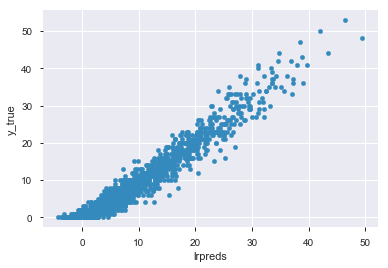

In [75]:
results.plot('lrpreds', 'y_true', kind='scatter')

Ridge

In [110]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [111]:
ridge = Ridge()
ridge.fit(X_train_sc, y_train)
print(ridge.score(X_test_sc, y_test))

0.943623300362877


In [112]:
# gridsearch for best parameters

gs_params = {
    'alpha': [1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

ridge_gridsearch = GridSearchCV(
    Ridge(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [113]:
ridge_gridsearch = ridge_gridsearch.fit(X_train_sc, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    3.2s finished


In [114]:
# Best parameters on the training data:
ridge_gridsearch.best_params_

{'alpha': 10, 'fit_intercept': True, 'normalize': False}

In [115]:
# accuracy score on train data
print(ridge_gridsearch.best_score_)

# assign the best estimator to a variable:
best_ridge = ridge_gridsearch.best_estimator_

# accuracy score on test data
print(best_ridge.score(X_test_sc, y_test))

0.9395089454090046
0.9437080181867996


In [128]:
ridgepreds = best_ridge.predict(X_test_sc)

In [129]:
results['ridgepreds'] = ridgepreds
results.head()

,y_true,lrpreds,ridgepreds,lassopreds
1082,0,0.408623,0.502397,0.522669
14981,9,10.769377,10.560732,10.510295
497,10,9.292704,9.254717,9.338180
9776,5,2.961676,3.062010,3.192187
1234,1,0.527699,0.620464,0.544467


Lasso

In [121]:
lasso = Lasso()
lasso.fit(X_train_sc, y_train)
print(lasso.score(X_test_sc, y_test))

0.8374608600196561


In [122]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.001, 0.01, 0.1],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [50, 500, 1000, 10000]
}

lasso_gridsearch = GridSearchCV(
    Lasso(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [123]:
lasso_gridsearch = lasso_gridsearch.fit(X_train_sc, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    6.5s finished


In [124]:
# Best parameters on the training data:
lasso_gridsearch.best_params_

{'alpha': 0.01, 'fit_intercept': True, 'max_iter': 500, 'normalize': False}

In [125]:
# accuracy score on train data
print(lasso_gridsearch.best_score_)

# assign the best estimator to a variable:
best_lasso = lasso_gridsearch.best_estimator_

# accuracy score on test data
print(best_lasso.score(X_test_sc, y_test))

0.9398594457524063
0.9437617586013491


In [126]:
lassopreds = best_lasso.predict(X_test_sc)

In [127]:
results['lassopreds'] = lassopreds
results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds
1082,0,0.408623,0.502397,0.522669
14981,9,10.769377,10.560732,10.510295
497,10,9.292704,9.254717,9.338180
9776,5,2.961676,3.062010,3.192187
1234,1,0.527699,0.620464,0.544467
6852,1,2.192777,2.226948,2.325526
3299,0,-1.778118,-1.851868,-1.859598
329,1,0.760300,0.686265,0.633713
15513,21,22.398642,21.866670,21.790117
9955,2,2.775705,2.931352,2.921280


Elastic Net

In [130]:
enet = ElasticNet()
enet.fit(X_train_sc, y_train)
print(enet.score(X_test_sc, y_test))

0.8067725919635518


In [132]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.001, 0.01, 0.1],
    'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [50, 500, 1000, 10000]
}

enet_gridsearch = GridSearchCV(
    ElasticNet(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [133]:
enet_gridsearch = enet_gridsearch.fit(X_train_sc, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done 267 tasks      | elapsed:   19.0s
[Parallel(n_jobs=4)]: Done 795 tasks      | elapsed:   42.1s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:   46.6s finished


In [134]:
# Best parameters on the training data:
enet_gridsearch.best_params_

{'alpha': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.9,
 'max_iter': 500,
 'normalize': False}

In [135]:
# accuracy score on train data
print(enet_gridsearch.best_score_)

# assign the best estimator to a variable:
best_enet = enet_gridsearch.best_estimator_

# accuracy score on test data
print(best_enet.score(X_test_sc, y_test))

0.9398246843132085
0.9437464179546049


In [136]:
enetpreds = best_enet.predict(X_test_sc)

In [137]:
results['enetpreds'] = enetpreds
results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds
1082,0,0.408623,0.502397,0.522669,0.534615
14981,9,10.769377,10.560732,10.510295,10.493755
497,10,9.292704,9.254717,9.338180,9.368731
9776,5,2.961676,3.062010,3.192187,3.225017
1234,1,0.527699,0.620464,0.544467,0.543521
6852,1,2.192777,2.226948,2.325526,2.324523
3299,0,-1.778118,-1.851868,-1.859598,-1.864048
329,1,0.760300,0.686265,0.633713,0.640923
15513,21,22.398642,21.866670,21.790117,21.783471
9955,2,2.775705,2.931352,2.921280,2.927675
